# How to preprocess images for vgg16

Note: the correct way to rescale image for vgg16 is using "preprocess_input" and not
datagen = ImageDataGenerator(rescale=1./255)

vgg16 was trained on images of size 224 × 244, preprocessed according to a few rules that are packaged in
the utility function keras.applications.vgg16.preprocess_input .

book, pag.173, cap. 5.4.3

In [1]:
from keras.preprocessing import image
from keras.applications.vgg16  import decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.applications import VGG16
import numpy as np

Using TensorFlow backend.


In [2]:
model_tot = VGG16(weights='imagenet')

In [3]:
base_dir = './cats_and_dogs_small/'

In [4]:
img_path = base_dir+'/train/cats/cat.432.jpg'

In [5]:
img = image.load_img(img_path, target_size=(224, 224))

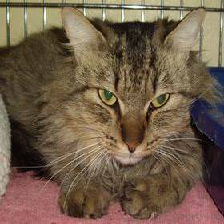

In [6]:
img

In [7]:
x = image.img_to_array(img)

In [8]:
x.shape

(224, 224, 3)

### Note: number between 0-255

In [9]:
x[0][0]

array([162., 159., 116.], dtype=float32)

In [10]:
x = np.expand_dims(x, axis=0)

In [11]:
x.shape

(1, 224, 224, 3)

In [12]:
x[0][0][0]

array([162., 159., 116.], dtype=float32)

### Correct preprocessing

In [13]:
x = preprocess_input(x)

In [14]:
x.shape

(1, 224, 224, 3)

### Note: these numbers are not between 0-1

In [15]:
x[0][0][0]

array([12.060997, 42.221   , 38.32    ], dtype=float32)

In [16]:
preds = model_tot.predict(x)

In [17]:
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02123045', 'tabby', 0.65847564), ('n02123159', 'tiger_cat', 0.20657682), ('n02124075', 'Egyptian_cat', 0.052201673)]
